## **Exploratory Data Analysis**

In [10]:
data_folder = "../../data/coverwallet"

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Coverwallet operates as an intermediary within the insurance sector, facilitating transactions between insurers and clients. Insurers typically require two main sets of information to determine whether to insure an individual:

* Client data, encompassing identification details, economic status, employment situation, and related factors.

* Industry classification of the client, delineating their business sector, such as startups, bars, or specific industries.

The industry classification, often represented by a six-digit **NAICS code**, is hierarchical but notoriously intricate in its categorization. Currently, approximately 30% of clients are classified simply as "other," leading to potential implications and complications in insurance coverage assessment and pricing.


**Objective**: To develop a data product capable of classifying clients with a NAICS code based on both free-text descriptions provided by the client and existing client information.

**Notes**:

* We aim to minimize the number of options provided for classification but we want greater certainty in the classification process.

* Primary market: United States - Free-text input in English.

* It's important to consider inference; the NAICS table contains various overlaps and complexities. Some industries may share similarities in their codes, while others may not. For example, medical-related entities could be associated with both manufacturing and healthcare sectors.

## NAICS information

The North American Industry Classification System (NAICS) is the standard used by Federal statistical agencies in classifying business establishments for the purpose of collecting, analyzing, and publishing statistical data related to the U.S. business economy.

**WHY NAICS?** 

They are frequently utilized by institutions that offer services to other businesses such as the ability to obtain small business loans from financial institutions. However, lenders don't solely rely on NAICS codes when assessing loan applications. They also take into account various other factors:

1. The risks associated with the specific services offered by the company, such as risks to employees, equipment, and consumers.

2. The historical, current, and projected future state of the industry to which the company belongs.

3. The typical business models employed by companies within a particular industry.

**NAICS STRUCTURE**


Each number in an NAICS code has a different meaning. The numbering system works as follows:

* The first and second numbers designate the economic sector a company operates in : 20 different sectors

| Sector | Definition                                                   |
|--------|--------------------------------------------------------------|
| 11     | Agriculture, Forestry, Fishing and Hunting                   |
| 21     | Mining, Quarrying, and Oil and Gas Extraction                |
| 22     | Utilities                                                    |
| 23     | Construction                                                 |
| 31-33  | Manufacturing                                               |
| 42     | Wholesale Trade                                              |
| 44-45  | Retail Trade                                                 |
| 48-49  | Transportation and Warehousing                               |
| 51     | Information                                                  |
| 52     | Finance and Insurance                                        |
| 53     | Real Estate and Rental and Leasing                           |
| 54     | Professional, Scientific, and Technical Services             |
| 55     | Management of Companies and Enterprises                      |
| 56     | Administrative and Support and Waste Management and Remediation Services |
| 61     | Educational Services                                         |
| 62     | Health Care and Social Assistance                            |
| 71     | Arts, Entertainment, and Recreation                          |
| 72     | Accommodation and Food Services                              |
| 81     | Other Services (except Public Administration)                |
| 92     | Public Administration                                        |



* The third number designates the sub-sector of the company
* The fourth indicates the industry group the company belongs to
* The fifth identifies the specific industry of the company
* The sixth number identifies the national industry the company belongs to

**IMPORTANT ISSUES**  https://www.naics.com/search/

* Can a business have more than one NAICS code? Yes, U.S. Census Bureau assigns and maintains only one NAICS code for each establishment based on its primary activity (most revenue one for the establishment).However, other agencies assign more than one NAICS codes to one establishment.

* Do NAICS codes change over time? Yes, they are reviewed every five years (in the years ending in 2 and 7). Latest version: 2022

* How can I determinate the correct NAICS code for my business? https://www.naics.com/search/

## Data provided : Kodiak

https://naics.askkodiak.com/naics/2022

In [13]:
data_kodiak_path = os.path.join(data_folder, "subsectors_description_Kodiak.csv")

data_kodiak = pd.read_csv(data_kodiak_path)

data_kodiak.head()

,subsector,doo_subsector,doo_subsector_keywords_yake
0,111,Industries in the Crop Production subsector gr...,"crop production subsector, production subsecto..."
1,112,Industries in the Animal Production and Aquacu...,"aquaculture subsector raise, establishment agr..."
2,113,Industries in the Forestry and Logging subsect...,"crop production subsector.consequently, crop p..."
3,114,"Industries in the Fishing, Hunting and Trappin...","trapping activities utilize, trapping subsecto..."
4,115,Industries in the Support Activities for Agric...,"forestry producing establishment, forestry pro..."


## Data provided : SBA dataset

**Dataset information**

In [16]:
data_sba_path = os.path.join(data_folder,"sba_dataset.csv")

data_sba = pd.read_csv(data_sba_path)

data_sba.head()

,BUSINESS_NAME,BUSINESS_OPT_TYPE,CONTACT,DESCRIPTION_KEYWORDS,DESCRIPTION_OF_OPERATIONS,EMAIL_ADDRESS,EMALL_PAGE_URL,EXPORT_BUSINESS_ACTIVITIES,EXPORT_BUSINESS_RELATIONSHIPS,EXPORT_COUNTRIES,...,IS_EXPORTER,LEGAL_STRUCTURE,MAIN_OR_BRANCH,NAICS,PHONE_NUMBER,QUALITY_ASSURANCE_STANDARDS,SPECIAL_EQUIPMENT_MATERIALS,TS,WEBPAGE,YEAR_ESTABLISHED
0,TALTON COMMUNICATIONS INC,NaN,JULIUS TALTON,"Inmate Payphones, Coined Payphones, VOIP Phone...",NaN,julius@talton.com,NaN,NaN,NaN,NaN,...,No,SC,Branch,"238210, 334111, 513210, 517121, 517810, 518210...",334-877-0704,NaN,NaN,2024-02-16 10:47:15,http://www.talton.com,2002.0
1,"FRASIER-OUSLEY CONSTRUCTION AND ENGINEERING, INC.","Construction, Service",DAVID OUSLEY,Building Contractor,NaN,dousley@frasier-ousley.com,NaN,NaN,NaN,NaN,...,No,SC,Branch,"236118, 236210, 236220, 237110, 238990, 238990...",334-872-3496,NaN,NaN,2024-02-16 10:47:15,NaN,1961.0
2,"R&R GROUND MAINTENANCE, INC.",Service,EARNEST RAYFORD,"Grass Mowing, Herbicide, Install fence, Landsc...","License Herbicide, Grass Mowing, Fence Install...",rrcgmi@centurytel.net,NaN,"Broker (Intermediary), Consultant, Distributor...","Joint venture/coventure, Other (Please explain...",NaN,...,Wants to Be,SC,Main,"115310, 115310, 115310, 221310, 238320, 324110...",334-996-8226,"ISO-9000 Series, ANSI/ASQC Z1.4, MIL-STD-45662...","Tractor, Bushhog, Mowers, Trucks, Trailers, Bu...",2024-02-16 10:47:15,NaN,1986.0
3,KASS AVIATION LLC,NaN,KEITH SMITH,"Aircraft, painting, stripping, refinishing, co...",Commercial and military professional aircraft ...,keith@kassaviation.com,https://www.kassaviation.com,NaN,NaN,NaN,...,No,LL,Main,"238320, 238990, 238990, 325510, 332722, 334413...",334-412-0912,NaN,NaN,2024-02-16 10:47:15,NaN,2009.0
4,BUSTER HOWELL D,NaN,DOUG BUSTER,NaN,NaN,doug@needdecals.com,NaN,NaN,NaN,NaN,...,NaN,SL,Branch,"323111, 323113, 339950, 541430, 541890",334-872-0226,NaN,NaN,2024-02-16 10:47:15,http://www.needdecals.com/,1978.0


Insights about data:

* Each sector has more than 6 NAICS codes, many of which do not align within the same sector.

* The first of these, TALTON COMMUNICATIONS INC, is a mobile company associated with sectors 23 (Construction), 33 (Manufacturing), and 51 (Information).

In [17]:
data_sba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65286 entries, 0 to 65285
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BUSINESS_NAME                  65286 non-null  object 
 1   BUSINESS_OPT_TYPE              12994 non-null  object 
 2   CONTACT                        65285 non-null  object 
 3   DESCRIPTION_KEYWORDS           23081 non-null  object 
 4   DESCRIPTION_OF_OPERATIONS      16580 non-null  object 
 5   EMAIL_ADDRESS                  65281 non-null  object 
 6   EMALL_PAGE_URL                 10637 non-null  object 
 7   EXPORT_BUSINESS_ACTIVITIES     3658 non-null   object 
 8   EXPORT_BUSINESS_RELATIONSHIPS  3441 non-null   object 
 9   EXPORT_COUNTRIES               3094 non-null   object 
 10  EXPORT_OBJECTIVE               3326 non-null   object 
 11  FULL_ADDRESS                   65286 non-null  object 
 12  IS_EXPORTER                    17740 non-null 

In [18]:
def assess_NA(data):

    null_sum = data.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    df_NA = pd.concat([total, percent], axis=1, sort=True, keys=['Number of NA', 'Percent NA'])

    return df_NA


nans = assess_NA(data_sba)
print(nans)

                               Number of NA  Percent NA
BUSINESS_NAME                             0        0.00
BUSINESS_OPT_TYPE                     52292       80.10
CONTACT                                   1        0.00
DESCRIPTION_KEYWORDS                  42205       64.65
DESCRIPTION_OF_OPERATIONS             48706       74.60
EMAIL_ADDRESS                             5        0.01
EMALL_PAGE_URL                        54649       83.71
EXPORT_BUSINESS_ACTIVITIES            61628       94.40
EXPORT_BUSINESS_RELATIONSHIPS         61845       94.73
EXPORT_COUNTRIES                      62192       95.26
EXPORT_OBJECTIVE                      61960       94.91
FULL_ADDRESS                              0        0.00
IS_EXPORTER                           47546       72.83
LEGAL_STRUCTURE                         788        1.21
MAIN_OR_BRANCH                            4        0.01
NAICS                                     5        0.01
PHONE_NUMBER                             30     

Insights:

* Some columns have a high proportion of missing data such as EXPORT_BUSINESS_ACTIVITIES, EXPORT_BUSINESS_RELATIONSHIPS, EXPORT_COUNTRIES, QUALITY_ASSURANCE_STANDARDS, and SPECIAL_EQUIPMENT_MATERIALS. We can't remove them a priori beacuse exporting companies may be subject to specific regulations or may operate in industries distinct from non-exporting companies.Variables such as QUALITY_ASSURANCE_STANDARDS and SPECIAL_EQUIPMENT_MATERIALS could be important indicators of the nature and focus of the business. Maybe companies that adhere to high-quality standars or require specialized equipment may operate in specific sectors reflected in their NAICS classification.


* Columns like DESCRIPTION_KEYWORDS and DESCRIPTION_OF_OPERATIONS contain textual descriptions that could contain valuable information for predicting NAICS codes. 

* Variables such as BUSINESS_OPT_TYPE, LEGAL_STRUCTURE, and WEBPAGE

* Columns like CONTACT, EMAIL_ADDRESS, PHONE_NUMBER could provide additional information about the company or individual, which could be relevant for predicting NAICS codes.

* The year of establishment (YEAR_ESTABLISHED) can provide information about the longevity and experience of the company

**NAICS**

In [19]:
def extract_list_NAICS(naics_codes):
    naics_list = str(naics_codes).split(",") 
    naics_list = [naics.strip() for naics in naics_list]
    
    return naics_list

naics_counts_per_row = data_sba['NAICS'].apply(extract_list_NAICS).apply(lambda x: len(set(x)))

naics_counts = naics_counts_per_row.value_counts().sort_index()

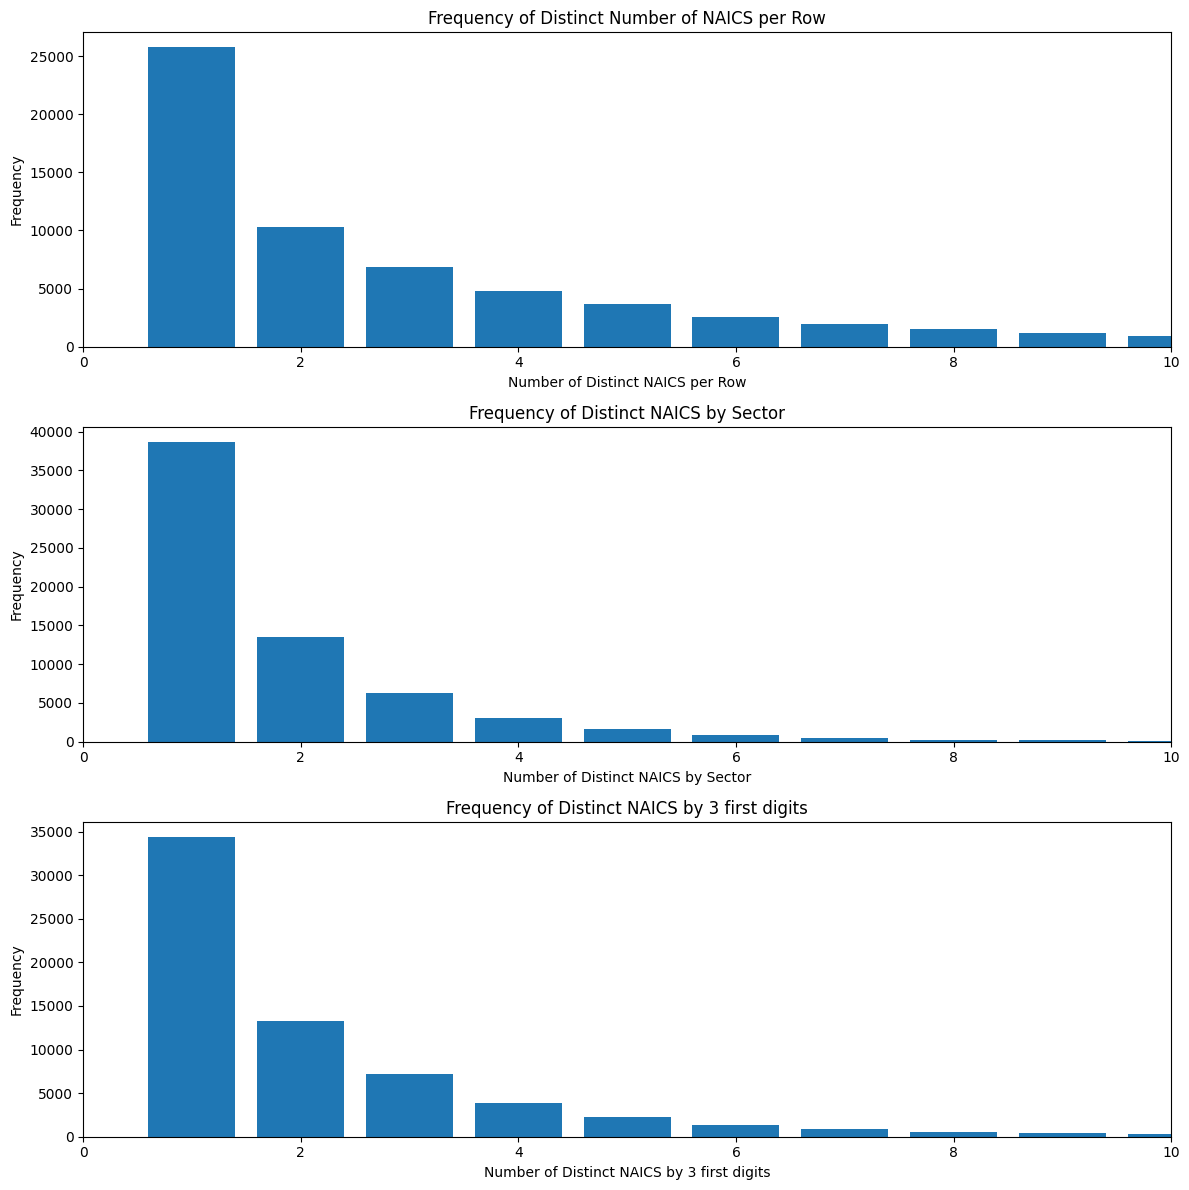

In [20]:
def extract_first_two_digits(naics_codes):
    naics_list = str(naics_codes).split(",")
    first_two_digits = [naics.strip()[:2] for naics in naics_list]
    return first_two_digits

def extract_first_three_digits(naics_codes):
    naics_list = str(naics_codes).split(",")
    first_three_digits = [naics.strip()[:3] for naics in naics_list]
    return first_three_digits

# Two digits
data_sba['First_Two_Digits_NAICS'] = data_sba['NAICS'].apply(extract_first_two_digits)
distinct_naics_counts_per_row_two_digits = data_sba['First_Two_Digits_NAICS'].apply(lambda x: len(set(x)))
distinct_naics_counts_two_digits = distinct_naics_counts_per_row_two_digits.value_counts().sort_index()

# Three digits
data_sba['First_Three_Digits_NAICS'] = data_sba['NAICS'].apply(extract_first_three_digits)
distinct_naics_counts_per_row_three_digits = data_sba['First_Three_Digits_NAICS'].apply(lambda x: len(set(x)))
distinct_naics_counts_three_digits = distinct_naics_counts_per_row_three_digits.value_counts().sort_index()

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

axs[0].bar(naics_counts.index, naics_counts.values)
axs[0].set_xlabel('Number of Distinct NAICS per Row')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency of Distinct Number of NAICS per Row')
axs[0].set_xlim(left=0, right=10)

axs[1].bar(distinct_naics_counts_two_digits.index, distinct_naics_counts_two_digits.values)
axs[1].set_xlabel('Number of Distinct NAICS by Sector')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Frequency of Distinct NAICS by Sector')
axs[1].set_xlim(left=0, right=10)

axs[2].bar(distinct_naics_counts_three_digits.index, distinct_naics_counts_three_digits.values)
axs[2].set_xlabel('Number of Distinct NAICS by 3 first digits')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Frequency of Distinct NAICS by 3 first digits')
axs[2].set_xlim(left=0, right=10)

plt.tight_layout()
plt.show()

In [21]:
df_naics_counts = pd.DataFrame({'Number of Distintct NAICS by sector per Row': distinct_naics_counts_two_digits.index[:10], 
                                'Frequency for six digits' : naics_counts.values[:10],
                                'Frequency for two digits': distinct_naics_counts_two_digits.values[:10]
                                , 'Frequency for three digits' : distinct_naics_counts_three_digits.values[:10]})

df_naics_counts

,Number of Distintct NAICS by sector per Row,Frequency for six digits,Frequency for two digits,Frequency for three digits
0,1,25755,38624,34351
1,2,10274,13467,13299
2,3,6880,6305,7186
3,4,4799,3088,3838
4,5,3650,1685,2250
5,6,2563,824,1326
6,7,1972,506,893
7,8,1491,283,586
8,9,1165,178,407
9,10,933,127,256


Insights:

* The majority of rows have a small number of NAICS codes associated with them. Around 25755 rows have only one NAICS code.

* As the number of NAICS codes per row increases, the frequency decreases gradually. For example, there are 10,274 rows with two NAICS codes, 6,880 rows with three NAICS codes, and so on.

* The frequency of rows with a high number of NAICS codes (e.g., more than 10) decreases significantly. For instance, there are only 85 rows with 28 NAICS codes, indicating that most businesses are associated with a limited number of industries.

* The majority of examples, comprising 38624 instances, are associated with only one distinct sector code per row, and the majority of them are associated with only one 3-digit NAICS code, specifically 34351.

**Would it be sufficient to work with these 34351 NAICS codes that present a unique three-digit code?** Let's study this case!

## **New Dataset : SBA dataset with only rows with a unique 3-digit code**

In [22]:
filtered_data_by_unique_3digits_code = data_sba[data_sba['First_Three_Digits_NAICS'].apply(lambda x: len(set(x)) == 1)]

filtered_data_by_unique_3digits_code.loc[:,'First_Three_Digits_NAICS'] = filtered_data_by_unique_3digits_code.loc[:,'First_Three_Digits_NAICS'].apply(lambda x : x[0])
filtered_data_by_unique_3digits_code.loc[:,'First_Two_Digits_NAICS'] = filtered_data_by_unique_3digits_code.loc[:,'First_Two_Digits_NAICS'].apply(lambda x : x[0])

In [23]:
filtered_data_by_unique_3digits_code.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34351 entries, 7 to 65285
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BUSINESS_NAME                  34351 non-null  object 
 1   BUSINESS_OPT_TYPE              4217 non-null   object 
 2   CONTACT                        34351 non-null  object 
 3   DESCRIPTION_KEYWORDS           8472 non-null   object 
 4   DESCRIPTION_OF_OPERATIONS      5553 non-null   object 
 5   EMAIL_ADDRESS                  34347 non-null  object 
 6   EMALL_PAGE_URL                 3525 non-null   object 
 7   EXPORT_BUSINESS_ACTIVITIES     1022 non-null   object 
 8   EXPORT_BUSINESS_RELATIONSHIPS  943 non-null    object 
 9   EXPORT_COUNTRIES               855 non-null    object 
 10  EXPORT_OBJECTIVE               907 non-null    object 
 11  FULL_ADDRESS                   34351 non-null  object 
 12  IS_EXPORTER                    6091 non-null   obje

**Problem** : Out of 35,000 existing examples, there are only 8,472 non-null instances in the column 'DESCRIPTION_KEYWORDS' and 5,553 non-null instances in the column 'DESCRIPTION_OF_OPERATIONS'. This significantly reduces the amount of available client data.

**Possible Solutions**:

* Data Augmentation: Augmenting existing data by generating synthetic examples based on the available text data. Techniques like text synthesis, paraphrasing, or adding noise can help increase the dataset size.

* Transfer Learning: Utilizing pre-trained language models (e.g., BERT, GPT) that have been trained on large corpora of text data. Fine-tuning these models on the available data can help improve performance, even with a limited amount of data.

* Semi-Supervised Learning: Incorporating unlabeled data along with the labeled data to train the model. Techniques such as self-training or co-training can be used to leverage the additional unlabeled data for improving model performance.

* Feature Engineering: Extracting additional features from the available text data that might provide useful information for predicting NAICS codes. This could include linguistic features, topic modeling, or domain-specific features.

**OTHERS**

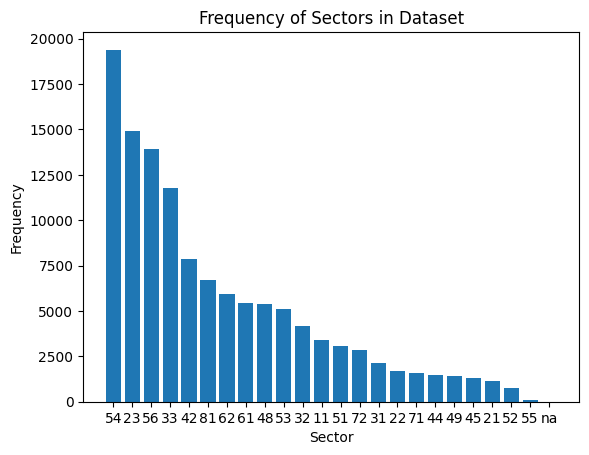

In [24]:
unique_sectors_per_row = data_sba['First_Two_Digits_NAICS'].apply(lambda x: list(set(x)))

flat_list = [item for sublist in unique_sectors_per_row for item in sublist]

frequency_count = pd.Series(flat_list).value_counts().sort_values(ascending=False)

plt.bar(frequency_count.index, frequency_count.values)

plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.title('Frequency of Sectors in Dataset')

plt.show()


* The most common sectors in the dataset are 54, 23, and 56, with approximately 20,000, 15,000, and a significant number of occurrences respectively.

* Sector 54, representing professional, scientific, and technical services, stands out as the most prevalent in the dataset, indicating a strong presence of businesses in fields such as consulting, legal services, accounting, and information technology.

* Construction, represented by sector 23, is also prominent in the dataset, suggesting significant activity in construction and development projects.

* Sector 56, encompassing administrative and support services as well as waste management and environmental remediation, closely follows the construction sector in terms of frequency, indicating a notable presence of companies engaged in business services and environmental management.

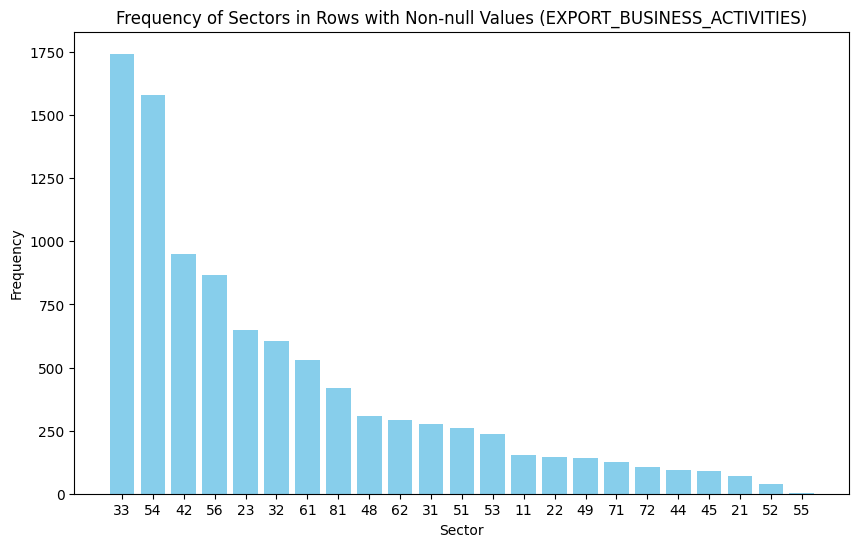

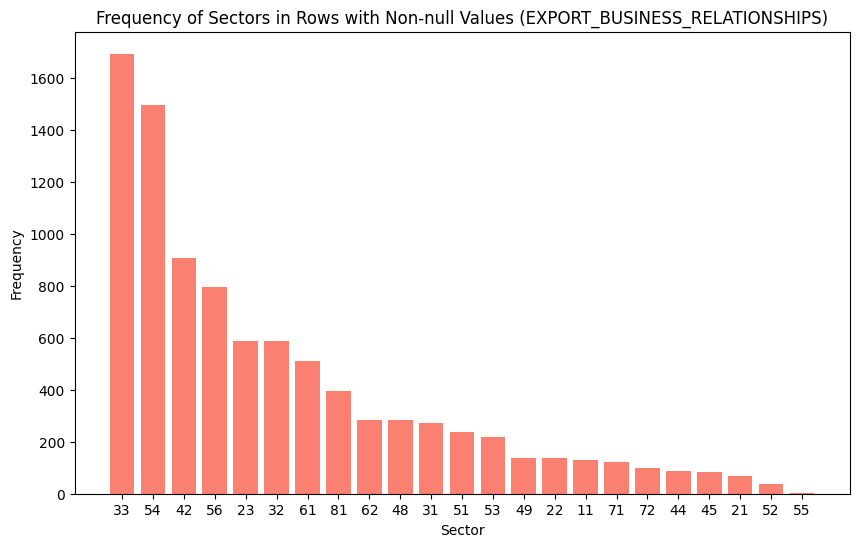

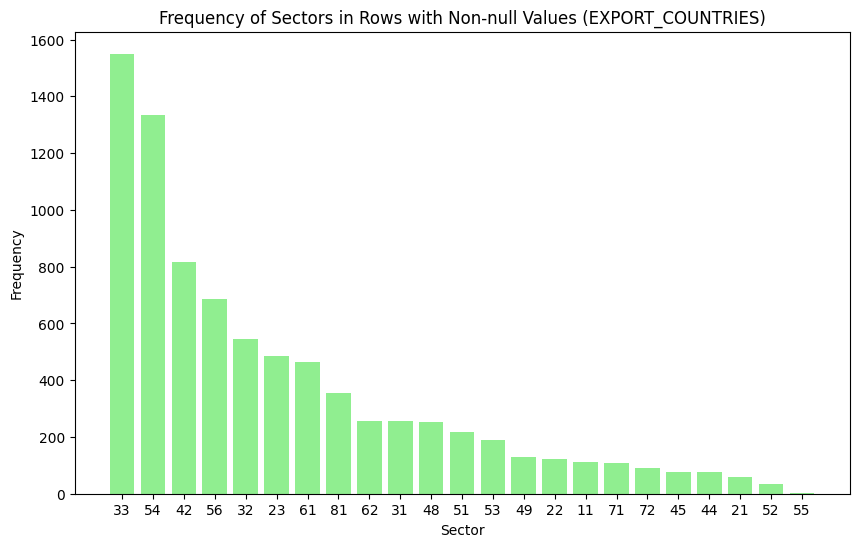

In [25]:
def plot_sector_frequency(data_sba, column_name, color):

    filtered_data = data_sba.dropna(subset=[column_name])


    unique_sectors_per_row = filtered_data['First_Two_Digits_NAICS'].apply(lambda x: list(set(x)))


    flat_list = [item for sublist in unique_sectors_per_row for item in sublist]


    frequency_count = pd.Series(flat_list).value_counts().sort_values(ascending=False)


    plt.figure(figsize=(10, 6))
    plt.bar(frequency_count.index, frequency_count.values, color=color)
    plt.xlabel('Sector')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Sectors in Rows with Non-null Values ({column_name})')
    plt.show()


plot_sector_frequency(data_sba, 'EXPORT_BUSINESS_ACTIVITIES', 'skyblue')
plot_sector_frequency(data_sba, 'EXPORT_BUSINESS_RELATIONSHIPS', 'salmon')
plot_sector_frequency(data_sba, 'EXPORT_COUNTRIES', 'lightgreen')


## **Data provided : SBS dataset** (2017)

**Important** : This dataset APPARENTLY includes 2017 NAICS and does not include the changes in the NAICS coding that were implemented in 2022. However, using the 2022 database, we can observe these changes and apply them retroactively to the 2017 dataset.

In [26]:
data_changes_NAICS_2017_2022_path = os.path.join(data_folder, "2022-2017-NAICS-Code-Concordance-1.csv")

data_changes_NAICS_2017_2022 = pd.read_csv(data_changes_NAICS_2017_2022_path, delimiter = ';', encoding='utf-8')

data_changes_NAICS_2017_2022.head()

data_changes_NAICS_2017_2022 = data_changes_NAICS_2017_2022.dropna()

Let's study the important changes between the NAICS codes!

In [27]:
data_changes_NAICS_2017_2022 = data_changes_NAICS_2017_2022[data_changes_NAICS_2017_2022.loc[:, 'Change to 2017 Code'] != "No Change"]
data_changes_NAICS_2017_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 66 to 1075
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Input Seq            238 non-null    float64
 1   2022 NAICS Code      238 non-null    float64
 2   2022 NAICS Title     238 non-null    object 
 3   Change to 2017 Code  238 non-null    object 
 4   2017 NAICS Code      238 non-null    object 
 5   2017 NAICS Code.1    238 non-null    object 
dtypes: float64(2), object(4)
memory usage: 13.0+ KB


In [28]:
data_changes_NAICS_2017_2022["2022 NAICS Code"] = data_changes_NAICS_2017_2022["2022 NAICS Code"].astype(int).astype(str)

Do NAICS codes change with very high granularity, or are there also changes in NAICS at the 2-3 digit level?

In [29]:
data_changes_NAICS_2017_2022_3first_digits_or_less = data_changes_NAICS_2017_2022[data_changes_NAICS_2017_2022["2022 NAICS Code"].apply(lambda x: x[0:3])
                                                                                  != data_changes_NAICS_2017_2022["2017 NAICS Code"].apply(lambda x: x[0:3])]

In [30]:
data_changes_NAICS_2017_2022_3first_digits_or_less.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 258 to 796
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Input Seq            139 non-null    float64
 1   2022 NAICS Code      139 non-null    object 
 2   2022 NAICS Title     139 non-null    object 
 3   Change to 2017 Code  139 non-null    object 
 4   2017 NAICS Code      139 non-null    object 
 5   2017 NAICS Code.1    139 non-null    object 
dtypes: float64(1), object(5)
memory usage: 7.6+ KB


**Insights:** A total of 139 NAICS codes have undergone changes to their initial three-digit codes between 2017 and 2022. Let's explore this further!

We create a single dataset containing unique changes from 2017 to 2022 for three-digit codes.

In [31]:
changes_NAICS = data_changes_NAICS_2017_2022_3first_digits_or_less[["2022 NAICS Code", "2017 NAICS Code"]].drop_duplicates()
changes_NAICS = changes_NAICS.rename(columns={"2022 NAICS Code": "2022_NAICS_Code", "2017 NAICS Code": "2017_NAICS_Code"})
changes_NAICS.head()

,2022_NAICS_Code,2017_NAICS_Code
258,325315,Added
575,441227,454110
577,441330,454110
578,441330,454390
583,444140,454110


**Insights** : Given the likelihood of needing to merge the 2017 dataset with the 2022 dataset, the aforementioned table could prove highly valuable for implementing changes to NAICS codes that alter their initial three digits.

In [33]:
data_sbs_path = os.path.join(data_folder, "SBS_Certified_Business_List.csv")

data_sbs = pd.read_csv(data_sbs_path)

**INFORMATION**

Creation of the dataset : 06/07/2023 !!!!!!!!!!!

| Column Name                               | Description                                                       |
|-------------------------------------------|-------------------------------------------------------------------|
| Account_Number                            | Vendor Number                                                     |
| Vendor_Formal_Name                        | Formal Name of the Company                                        |
| Vendor_DBA                                | Name the Company goes by                                          |
| First_Name                                | First Name of the Company's Contact Person                        |
| Last_Name                                 | Last Name of the Company's Contact Person                         |
| telephone                                 | Telephone Number                                                  |
| Email                                     | Email Address                                                     |
| Business_Description                      | A brief description of the type of service provided               |
| certification                             | Type of Certification the company qualified for                   |
| Certification_Renewal_Date                | Date on which certification was renewed                           |
| Ethnicity                                 | Ethnicity of the Company owner(s)                                 |
| Address_Line_1                            | Company Address                                                   |
| Address_Line_2                            | Company Address                                                   |
| City                                      | City in which Company is located                                  |
| State                                     | State in which Company is located                                 |
| ZIP                                       | ZIP code                                                          |
| Mailing_Address_Line_1                   | Company mailing address                                           |
| Mailing_Address_Line_2                   | Company mailing address2                                          |
| Mailing_City                             | City                                                              |
| Mailing_State                            | State                                                             |
| Mailing_Zip                              | ZIP code                                                          |
| Website                                  | Company Website                                                   |
| Date_Of_Establishment                    | Date the Company was Established                                  |
| Aggregate_Bonding_Limit                  | Bonding Limit                                                     |
| Signatory_to_Union_Contract_s_           | Signatory to Union contracts                                      |
| ID6_digit_NAICS_code                     | North American Industry Classification System (NAICS) Code        |
| NAICS_Sector                             | NAICS sector (Industry)                                           |
| NAICS_Subsector                          | NAICS Subsector                                                   |
| NAICS_Title                              | Type of Business                                                  |
| Types_of_Construction_Projects_Performed | Type of jobs performed in the construction industry               |
| NIGP_codes                               | National Institute of Governmental Purchasing (NIGP) Codes        |
| Name_of_Client___Job_Exp_1               | The Business the vendor is working for                            |
| Largest_Value_of_Contract                | Value (in dollars) of the contract                                |
| Percent_Self_Performed___Job_Exp_1       | Percent of the job performed by the vendor                        |
| Date_of_Work___Job_Exp_1                 | Date the work was done                                            |
| Description_of_Work___Job_Exp_1          | Description of the work done                                      |
| Name_of_Client___Job_Exp_2               | Name of second business the vendor is working for                 |
| Value_of_Contract___Job_Exp_2            | Value (in dollars) of the contract                                |
| Percent_Self_Performed___Job_Exp_2       | Percent of the job performed by the vendor                        |
| Date_of_Work___Job_Exp_2                 | Date the work was done                                            |
| Description_of_Work___Job_Exp_2          | Description of the work done                                      |
| Name_of_Client___Job_Exp_3               | Name of third business the vendor is working for                  |
| Value_of_Contract___Job_Exp_3            | Value (in dollars) of the contract                                |
| Percent_Self_Performed___Job_Exp_3       | Percent of the job performed by the vendor                        |
| Date_of_Work___Job_Exp_3                 | Date the work was done                                            |
| Description_of_Work___Job_Exp_3          | Description of the work done                                      |
| Capacity_Building_Programs               |                                                                     |
| Enrolled_in_PASSPort                     | Enrollment in the NYC's Procurement and Sourcing Solutions Portal |

In [34]:
data_sbs.head()

,Account_Number,Vendor_Formal_Name,Vendor_DBA,First_Name,Last_Name,telephone,Business_Description,Certification,Certification_Renewal_Date,Ethnicity,...,Enrolled_in_PASSPort,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,311147,#1Pho Inc,Zenyai,Albert,Jethanamest,6463879761,Zenyai Viet Cajun & Pho Restaurant is dedicate...,MBE,10/31/2025,ASIAN,...,Yes,BROOKLYN,40.714065,-73.960252,301.0,34.0,3397699.0,3.023938e+09,551.0,BK0102
1,357418,#NAME?,"Kilduff Underground Engineering, Inc.",Todd,Kilduff,2019939696,"Kilduff Underground Engineering, Inc. (KUE) is...",MBE,7/31/2025,HISPANIC,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,331157,024 Inc,NaN,Gena,Surphlis,3479035447,024™ is a premium home fragrance brand that de...,"MBE,WBE",04/30/2026;04/30/2026,BLACK,...,No,BRONX,40.863508,-73.821595,210.0,12.0,2093860.0,2.051350e+09,30202.0,BX1004
3,10003,1 Call Building Maintenance Corp.,NaN,Lorris,Alleyne,3474690806,Our Services include Office Cleaning Carpet cl...,MBE,3/31/2026,BLACK,...,Yes,BROOKLYN,40.680772,-73.962817,308.0,35.0,3027510.0,3.011240e+09,203.0,BK0801
4,342721,1 Of A Kind Home Health Care L.L.C.,NaN,Andrea,David,7183008023,NYS Licensed Home Health Agency,"MBE,WBE",03/31/2027;03/31/2027,BLACK,...,Yes,BROOKLYN,40.703905,-73.928988,304.0,34.0,3258681.0,3.031580e+09,427.0,BK0401


In [35]:
data_sbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Account_Number                             11430 non-null  int64  
 1   Vendor_Formal_Name                         11430 non-null  object 
 2   Vendor_DBA                                 1493 non-null   object 
 3   First_Name                                 11407 non-null  object 
 4   Last_Name                                  11406 non-null  object 
 5   telephone                                  11418 non-null  object 
 6   Business_Description                       11423 non-null  object 
 7   Certification                              11430 non-null  object 
 8   Certification_Renewal_Date                 8266 non-null   object 
 9   Ethnicity                                  11427 non-null  object 
 10  Address_Line_1        

In [36]:
data_sbs['ID6_digit_NAICS_code'].head()

0    722511
1    541330
2    453998
3    561720
4    621610
Name: ID6_digit_NAICS_code, dtype: int64

**Insights**: One unique NAICS code per example, which is an improvement over the previous dataset where most examples had multiple NAICS codes.